In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('headbrain.csv')
print(dataset.shape)

X = dataset['Head Size(cm^3)'].values
Y = dataset['Brain Weight(grams)'].values

(237, 4)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

X_mean = np.mean(X_train)
Y_mean = np.mean(Y_train)

numerator = np.sum((X_train - X_mean) * (Y_train - Y_mean))
denominator = np.sum((X_train - X_mean) ** 2)

b1 = numerator / denominator
b0 = Y_mean - (X_mean * b1)

print(f'b0 = {b0}')
print(f'b1 = {b1}')

b0 = 302.32024461688957
b1 = 0.2701648619318753


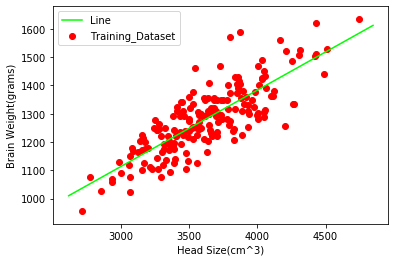

In [27]:
X_max = np.max(X_train) + 100
X_min = np.min(X_train) - 100

x_tr = np.linspace(X_min, X_max, 1000)
y_tr = b0 + b1 * x_tr 

plt.plot(x_tr, y_tr, c = '#00ff00', label = 'Line')
plt.scatter(X_train, Y_train, c = '#ff0000' ,label = 'Training_Dataset')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [39]:
def acc(x_act, y_act):
    y_pred = b0 + b1 * x_act 
    n = len(x_act)
    rmse = np.sqrt((np.sum((y_act - y_pred) ** 2) / n)) 
    rss = np.sum((y_act - y_pred) ** 2)
    tss = np.sum((y_act - np.mean(y_act)) ** 2)
    r2 = 1 - (rss / tss)

    return rmse, r2                                                                         

In [41]:
train_rmse, train_r2 = acc(X_train, Y_train)
test_rmse, test_r2 = acc(X_test, Y_test)

print(f'Training Set\nRMSE = {train_rmse}\nR2 = {train_r2}')
print(f'Testing Set\nRMSE = {test_rmse}\nR2 = {test_r2}')

Training Set
RMSE = 69.93989959279556
R2 = 0.6594432073670699
Testing Set
RMSE = 80.36387262154912
R2 = 0.5571552826824453
